# https://elitedatascience.com/keras-tutorial-deep-learning-in-python

In [1]:
# 3. Import libraries and modules
import numpy as np
np.random.seed(123)  # for reproducibility

In [2]:
np.random.seed(123)  # for reproducibility

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.


In [37]:
# 4. Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [38]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


7 0 4 1


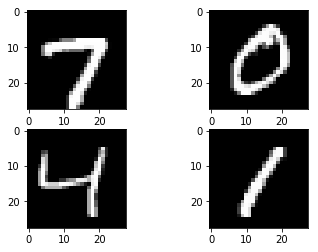

In [39]:
import matplotlib.pyplot as plt
# plot 4 images as gray scale
plt.subplot(221)
print(y_train[4545],y_train[1],y_train[2],y_train[3])
plt.imshow(X_train[4545], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [40]:
# Reshape the Input for the backend

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

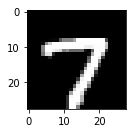

In [41]:
plt.subplot(224)
plt.imshow(X_train[4545][0], cmap=plt.get_cmap('gray'))
plt.show()

In [42]:
# convert data type and normalize values
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


7


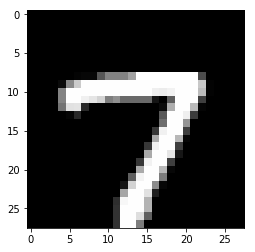

In [43]:
print(y_train[4545])
plt.imshow(X_train[4545][0], cmap=plt.get_cmap('gray'))
plt.show()

In [46]:
print (y_train.shape)
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print (Y_train.shape)

(60000,)
(60000, 10)


In [78]:
model = Sequential()
# add a sequential layer

In [81]:
# declare a input layer
model.add(Convolution2D(32,(3,3),activation='relu',data_format='channels_first',input_shape=(1,28,28)))

In [82]:
print (model.output_shape)

(None, 32, 24, 24)


In [83]:
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

/home/alex/tensorflow/local/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


In [84]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))# output 10 classes corresponds to 0 to 9 digits we need to find

In [85]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [86]:
model.fit(X_train, Y_train,batch_size=32, nb_epoch=10, verbose=1)

/home/alex/tensorflow/local/lib/python3.5/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 24s 400us/step - loss: 0.2354 - acc: 0.9288
Epoch 2/10
60000/60000 [==============================] - 14s 232us/step - loss: 0.0908 - acc: 0.9736
Epoch 3/10
60000/60000 [==============================] - 14s 230us/step - loss: 0.0679 - acc: 0.9804
Epoch 4/10
60000/60000 [==============================] - 14s 233us/step - loss: 0.0566 - acc: 0.9834
Epoch 5/10
60000/60000 [==============================] - 14s 233us/step - loss: 0.0510 - acc: 0.9850
Epoch 6/10
60000/60000 [==============================] - 14s 231us/step - loss: 0.0439 - acc: 0.9863
Epoch 7/10
60000/60000 [==============================] - 14s 233us/step - loss: 0.0402 - acc: 0.9878
Epoch 8/10
60000/60000 [==============================] - 14s 234us/step - loss: 0.0356 - acc: 0.9888
Epoch 9/10
60000/60000 [==============================] - 14s 232us/step - loss: 0.0340 - acc: 0.9899
Epoch 10/10
60000/60000 [==============================] - 14s 233us/step - loss: 

In [88]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.035374357837486194, 0.99080000000000001]


In [100]:
k = np.array(X_train[4545]) #seven

In [107]:
print(k.shape)
y= k.reshape(1,1,28,28)
print(y.shape)

(1, 28, 28)
(1, 1, 28, 28)


In [112]:
prediction = model.predict(y)
print(prediction)

1/1 [==============================] - 0s 10ms/step
[7]


In [113]:
model.predict_classes(y)

1/1 [==============================] - 0s 6ms/step


array([7])